# Automated Diagnosis of Malaria Using Convolutional Neural Networks

## Importing Libraries

In [1]:
from __future__ import absolute_import, division, print_function
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import cv2
import random
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import os

In [2]:
#Directory Listing for Malaria Cell Images Dataset
print(os.listdir("../IQGateway/cell_images/cell_images"))

['Parasitized', 'Uninfected']


In [3]:
#Data Directory Parsing for Malaria Cell Images
infected = os.listdir('../IQGateway/cell_images/cell_images/Parasitized/') 
uninfected = os.listdir('../IQGateway/cell_images/cell_images/Uninfected/')

## Data Preprocessing and EDA

In [4]:
#  Data Loading and Augmentation for Malaria Cell Images
data = []
labels = []

for i in infected:
    try:
    
        image = cv2.imread("../IQGateway/cell_images/cell_images/Parasitized/"+i)
        image_array = Image.fromarray(image , 'RGB')
        resize_img = image_array.resize((50 , 50))
        rotated45 = resize_img.rotate(45)
        rotated75 = resize_img.rotate(75)
        blur = cv2.blur(np.array(resize_img) ,(10,10))
        data.append(np.array(resize_img))
        data.append(np.array(rotated45))
        data.append(np.array(rotated75))
        data.append(np.array(blur))
        labels.append(1)
        labels.append(1)
        labels.append(1)
        labels.append(1)
        
    except AttributeError:
        print('')

        
for u in uninfected:
    try:
        
        image = cv2.imread("../IQGateway/cell_images/cell_images/Uninfected/"+u)
        image_array = Image.fromarray(image , 'RGB')
        resize_img = image_array.resize((50 , 50))
        rotated45 = resize_img.rotate(45)
        rotated75 = resize_img.rotate(75)
        data.append(np.array(resize_img))
        data.append(np.array(rotated45))
        data.append(np.array(rotated75))
        labels.append(0)
        labels.append(0)
        labels.append(0)
        
    except AttributeError:
        print('')

In [5]:
# Data Conversion and Saving
cells = np.array(data)
labels = np.array(labels)

np.save('Cells' , cells)
np.save('Labels' , labels)

In [6]:
print('Cells : {} | labels : {}'.format(cells.shape , labels.shape))

Cells : (96453, 50, 50, 3) | labels : (96453,)


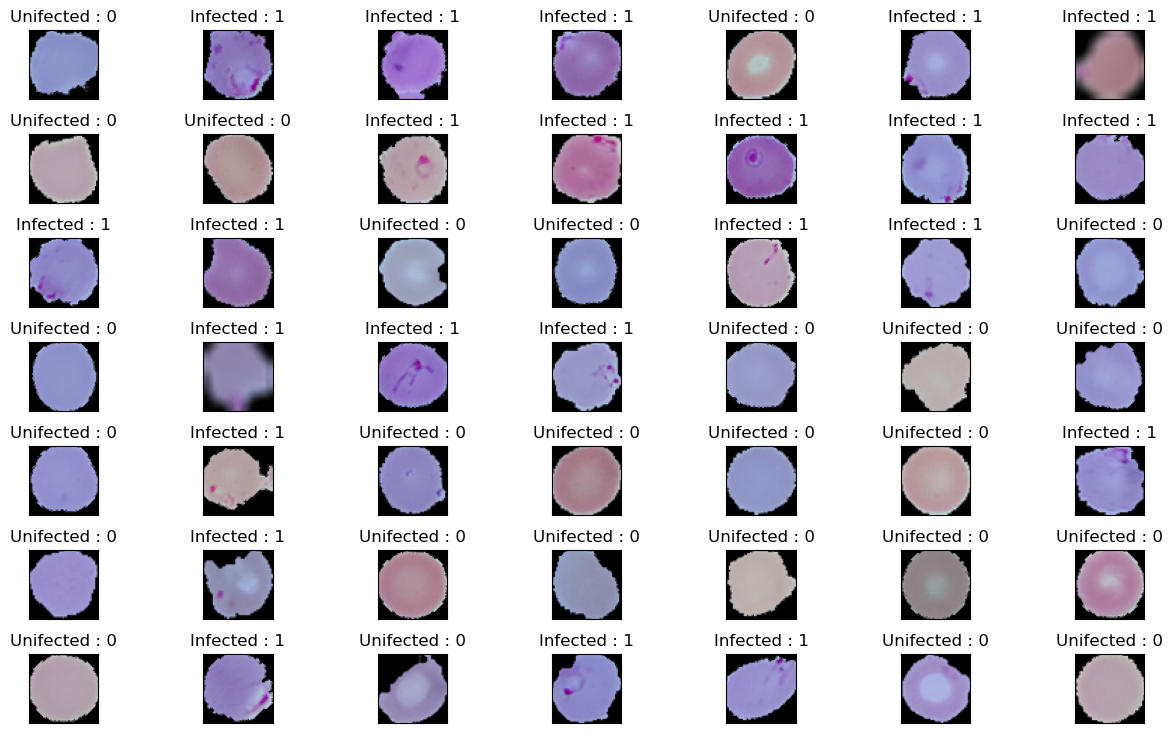

In [7]:
# Visualization of Sample Images
plt.figure(1 , figsize = (15 , 9))
n = 0 
for i in range(49):
    n += 1 
    r = np.random.randint(0 , cells.shape[0] , 1)
    plt.subplot(7 , 7 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    plt.imshow(cells[r[0]])
    plt.title('{} : {}'.format('Infected' if labels[r[0]] == 1 else 'Unifected' ,
                               labels[r[0]]) )
    plt.xticks([]) , plt.yticks([])
    
plt.show()


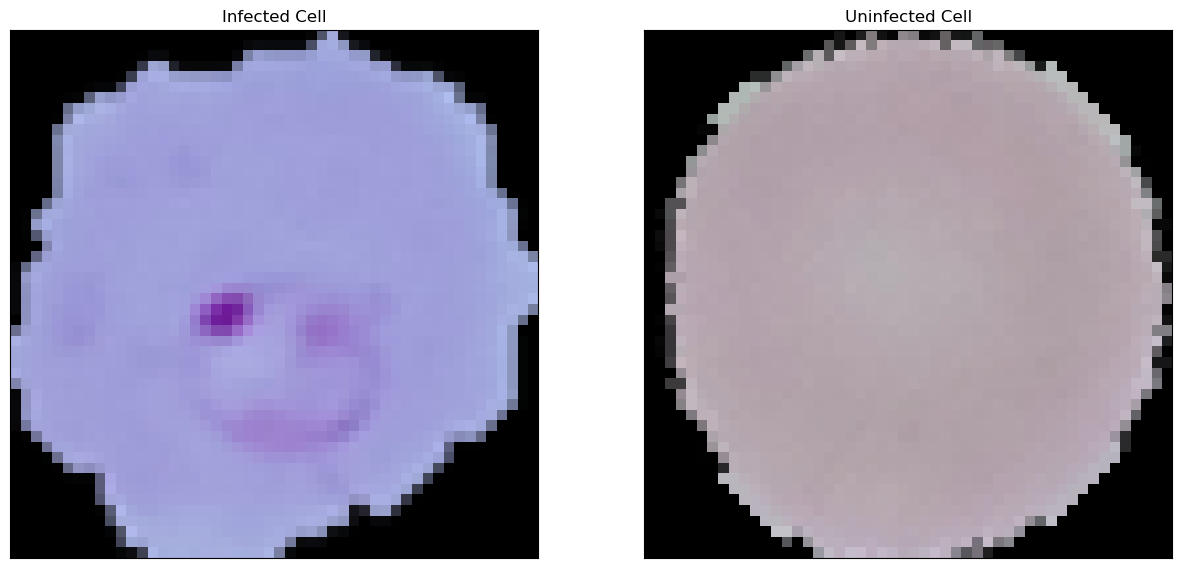

In [8]:
# Display of Infected and Uninfected Cells
plt.figure(1, figsize = (15 , 7))
plt.subplot(1 , 2 , 1)
plt.imshow(cells[0])
plt.title('Infected Cell')
plt.xticks([]) , plt.yticks([])

plt.subplot(1 , 2 , 2)
plt.imshow(cells[67000])
plt.title('Uninfected Cell')
plt.xticks([]) , plt.yticks([])

plt.show()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_17116\3691714476.py:56: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(pad=2.0)  # Adjust padding between subplots
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_17116\3691714476.py:56: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout(pad=2.0)  # Adjust padding between subplots


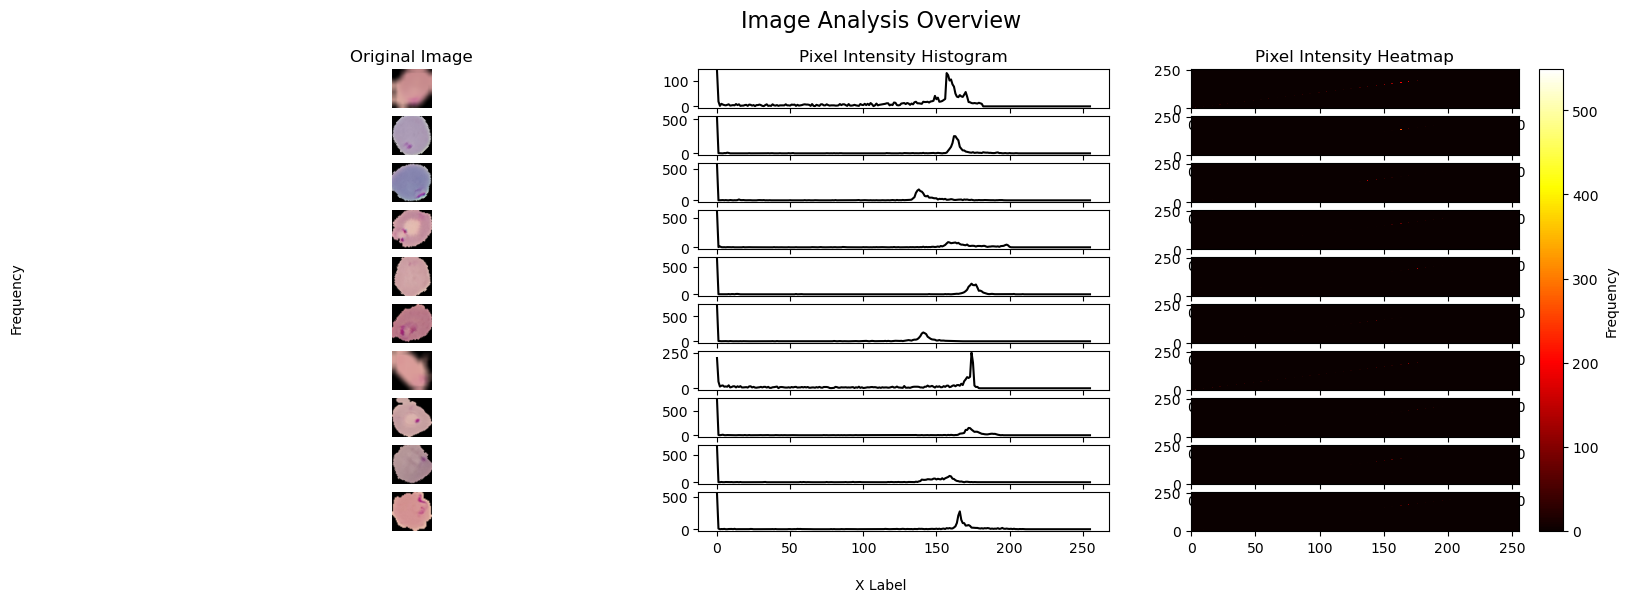

In [9]:
# Exploratory Image Analysis: Histograms and Heatmaps
def generate_histogram(image):
    # Convert image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Compute histogram
    hist = cv2.calcHist([gray_image], [0], None, [256], [0, 256])
    
    return hist

def generate_heatmap(image):
    # Convert image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Compute 2D histogram (heatmap)
    heatmap, _, _ = np.histogram2d(gray_image.ravel(), gray_image.ravel(), bins=256, range=[[0, 256], [0, 256]])
    
    return heatmap

# Assuming 'data' contains the images generated and 'labels' contains their corresponding labels

# Sample a random subset of images
num_images = 10  # Number of images to visualize
random_indices = random.sample(range(len(data)), num_images)

# Generate histograms and heatmaps for the sampled images
fig, axes = plt.subplots(num_images, 3, figsize=(18, 6))

# Set general titles and labels for all subplots
fig.suptitle('Image Analysis Overview', fontsize=16)
fig.text(0.5, 0.02, 'X Label', ha='center', va='center')
fig.text(0.02, 0.5, 'Frequency', ha='center', va='center', rotation='vertical')

for i, idx in enumerate(random_indices):
    img = data[idx]
    
    # Plot original image
    axes[i, 0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    axes[i, 0].axis('off')
    
    # Generate and plot histogram
    hist = generate_histogram(img)
    axes[i, 1].plot(hist, color='black')
    
    # Generate and plot heatmap
    heatmap = generate_heatmap(img)
    heatmap_img = axes[i, 2].imshow(heatmap.T, cmap='hot', interpolation='nearest', aspect='auto', origin='lower')

# Set specific titles for certain columns
axes[0, 0].set_title('Original Image')
axes[0, 1].set_title('Pixel Intensity Histogram')
axes[0, 2].set_title('Pixel Intensity Heatmap')

# Add colorbar for the heatmap
plt.colorbar(heatmap_img, ax=axes[:, 2], label='Frequency')

plt.tight_layout(pad=2.0)  # Adjust padding between subplots
plt.show()


In [10]:
# Data suffling
n = np.arange(cells.shape[0])
np.random.shuffle(n)
cells = cells[n]
labels = labels[n]

In [11]:
# Normalization
cells = cells.astype(np.float32)
labels = labels.astype(np.int32)
cells = cells/255

## Model Building

In [12]:
# Dataset Splitting for Model Training and Evaluation
from sklearn.model_selection import train_test_split

train_x , x , train_y , y = train_test_split(cells , labels , 
                                            test_size = 0.2 ,
                                            random_state = 111)

eval_x , test_x , eval_y , test_y = train_test_split(x , y , 
                                                    test_size = 0.5 , 
                                                    random_state = 111)

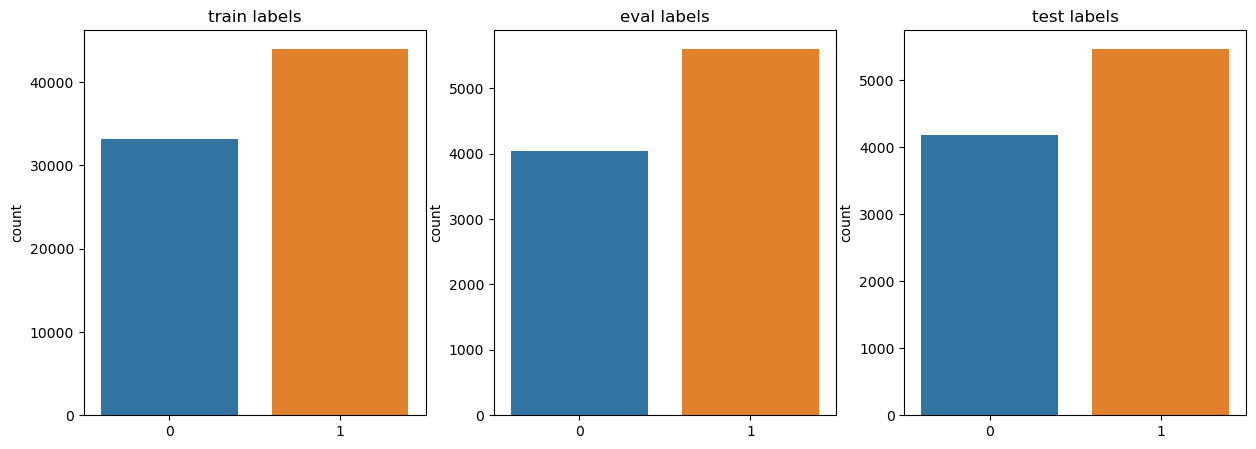

In [13]:
# Distribution of Class Labels in Training, Evaluation, and Test Sets
plt.figure(1 , figsize = (15 ,5))
n = 0 
for z , j in zip([train_y , eval_y , test_y] , ['train labels','eval labels','test labels']):
    n += 1
    plt.subplot(1 , 3  , n)
    sns.countplot(x = z )
    plt.title(j)
plt.show()

In [14]:
print('train data shape {} ,eval data shape {} , test data shape {}'.format(train_x.shape,
                                                                           eval_x.shape ,
                                                                           test_x.shape))

train data shape (77162, 50, 50, 3) ,eval data shape (9645, 50, 50, 3) , test data shape (9646, 50, 50, 3)


In [15]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Define the CNN model using the Keras API
def cnn_model_fn():
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(50, (7, 7), padding='same', activation='relu', input_shape=(50, 50, 3)),
        tf.keras.layers.Conv2D(90, (3, 3), padding='valid', activation='relu'),
        tf.keras.layers.Conv2D(10, (5, 5), padding='same', activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(5, (3, 3), padding='same', activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2), padding='same'),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(2000, activation='relu'),
        tf.keras.layers.Dense(1000, activation='relu'),
        tf.keras.layers.Dense(500, activation='relu'),
        tf.keras.layers.Dense(2)
    ])
    return model


In [16]:
# Instantiate the model
malaria_detector = cnn_model_fn()

C:\Users\ADMIN\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [17]:
# Compile the model
malaria_detector.compile(optimizer='adam',
                          loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                          metrics=['accuracy'])


In [18]:
# Train the model
history = malaria_detector.fit(train_x, train_y, epochs=10, batch_size=100, validation_data=(eval_x, eval_y))


Epoch 1/10
772/772 ━━━━━━━━━━━━━━━━━━━━ 498s 637ms/step - accuracy: 0.6810 - loss: 0.5238 - val_accuracy: 0.9574 - val_loss: 0.1282
Epoch 2/10
772/772 ━━━━━━━━━━━━━━━━━━━━ 480s 621ms/step - accuracy: 0.9578 - loss: 0.1241 - val_accuracy: 0.9625 - val_loss: 0.1149
Epoch 3/10
772/772 ━━━━━━━━━━━━━━━━━━━━ 479s 620ms/step - accuracy: 0.9639 - loss: 0.1073 - val_accuracy: 0.9623 - val_loss: 0.1130
Epoch 4/10
772/772 ━━━━━━━━━━━━━━━━━━━━ 481s 623ms/step - accuracy: 0.9668 - loss: 0.0965 - val_accuracy: 0.9588 - val_loss: 0.1119
Epoch 5/10
772/772 ━━━━━━━━━━━━━━━━━━━━ 483s 626ms/step - accuracy: 0.9692 - loss: 0.0909 - val_accuracy: 0.9621 - val_loss: 0.1130
Epoch 6/10
772/772 ━━━━━━━━━━━━━━━━━━━━ 481s 623ms/step - accuracy: 0.9734 - loss: 0.0768 - val_accuracy: 0.9608 - val_loss: 0.1216
Epoch 7/10
772/772 ━━━━━━━━━━━━━━━━━━━━ 478s 619ms/step - accuracy: 0.9761 - loss: 0.0675 - val_accuracy: 0.9584 - val_loss: 0.1435
Epoch 8/10
772/772 ━━━━━━━━━━━━━━━━━━━━ 476s 617ms/step - accuracy: 0.9806 -

In [19]:
# Evaluate the model
eval_results = malaria_detector.evaluate(eval_x, eval_y)
print("Evaluation results:", eval_results)

302/302 ━━━━━━━━━━━━━━━━━━━━ 19s 63ms/step - accuracy: 0.9600 - loss: 0.1678
Evaluation results: [0.1559758484363556, 0.9600829482078552]


In [20]:
# Make predictions
y_pred_prob = malaria_detector.predict(test_x)
y_pred = np.argmax(y_pred_prob, axis=1)

302/302 ━━━━━━━━━━━━━━━━━━━━ 19s 62ms/step


In [21]:
# Calculate metrics
print("Accuracy:", accuracy_score(test_y, y_pred))
print("Confusion Matrix:\n", confusion_matrix(test_y, y_pred))
print("Classification Report:\n", classification_report(test_y, y_pred))

Accuracy: 0.9629898403483309
Confusion Matrix:
 [[4017  158]
 [ 199 5272]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.96      4175
           1       0.97      0.96      0.97      5471

    accuracy                           0.96      9646
   macro avg       0.96      0.96      0.96      9646
weighted avg       0.96      0.96      0.96      9646



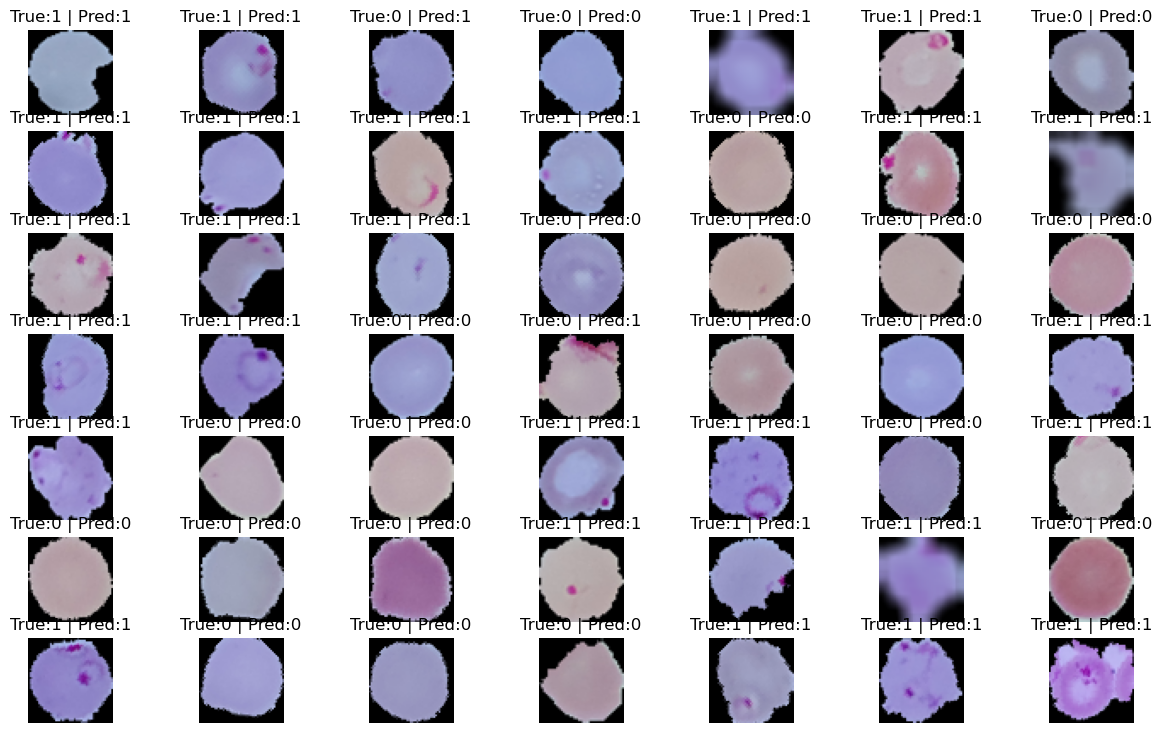

In [24]:
# Visualize some predictions
plt.figure(figsize=(15, 9))
for i in range(49):
    r = np.random.randint(0, test_x.shape[0])
    plt.subplot(7, 7, i+1)
    plt.imshow(test_x[r])
    plt.title('True:{} | Pred:{}'.format(test_y[r], y_pred[r]))
    plt.axis('off')
plt.show()


## Serialization of Model Architecture and Weights

In [32]:
# Save the model architecture to a JSON file
with open('malaria_detector_architecture.json', 'w') as f:
    f.write(malaria_detector.to_json())

# Save the model weights to an HDF5 file with the correct filename
malaria_detector.save_weights('malaria_detector_weights.weights.h5')

# Optionally, save other relevant information such as training history
with open('training_history.pkl', 'wb') as f:
    pickle.dump(histimport streamlit as st
